# Visualisations of profiling data from the JUMP-Scope project

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import utilssphering
import numpy as np
import seaborn as sns

In [26]:
# Load data
# df_replicating = pd.read_csv("checkpoints/moa-replicating-sphering.csv")
# df_matching = pd.read_csv("checkpoints/moa-matching-sphering.csv")

df_replicating = pd.read_csv("checkpoints/moa-replicating-sphering.csv", converters={'Null_Replicating':utilssphering.safe_literal_eval, "Replicating":utilssphering.safe_literal_eval})
df_matching = pd.read_csv("checkpoints/moa-matching-sphering.csv", converters={'Null_Matching':utilssphering.safe_literal_eval, "Matching":utilssphering.safe_literal_eval})

df_matching

,Unnamed: 0.1,Unnamed: 0,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,...,dry-immersion,vs-brightfield,simultaneous-excitation,sites,Matching,Null_Matching,Percent_Matching,Value_95,sphering,cell_count
0,0,0,MolDev,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,1.0,1,...,NaN,NaN,NaN,1.0,"[0.35071144346471655, 0.10160465563984875, 0.0...","[0.08544473859084248, -0.03876060481163979, 0....",18.604651,0.170605,True,511430.0
1,1,1,MolDev,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,4,1.0,1,...,NaN,NaN,NaN,1.0,"[0.18702255680249674, 0.07427635098930599, 0.0...","[0.08794062351459597, -0.005996585699042516, 0...",9.302326,0.230777,False,511430.0
2,2,2,MolDev,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,1.0,1,...,NaN,NaN,NaN,1.0,"[0.4606618247404734, 0.14811795860009075, -0.0...","[-0.016740592144938497, 0.26180568114446157, 0...",16.279070,0.247795,True,617546.0
3,3,3,MolDev,1siteSubSample_Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,1.0,1,...,NaN,NaN,NaN,1.0,"[0.20698204580441937, 0.11978347592518968, 0.0...","[0.12733782135180757, 0.04483825855146238, -0....",13.953488,0.358143,False,617546.0
4,4,4,MolDev,1siteSubSample_Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,1.0,1,...,NaN,NaN,NaN,1.0,"[0.5964069668030663, 0.2299215609249302, -0.00...","[0.13414755778458695, -0.12276898890156943, 0....",20.930233,0.284703,True,608864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,361,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,JUMP-MOA_compound_platemap,BRO0117059_20X,Confocal,9,NaN,1,...,water,yes,4.0,9.0,"[0.6999559304229601, 0.08263041919223424, 0.02...","[0.2835928913531466, 0.09961516540142579, 0.28...",20.930233,0.490308,False,NaN
362,362,362,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,NaN,1,...,water,yes,1.0,9.0,"[0.5830110295719378, 0.07958016758653769, -0.1...","[0.12658595114624016, 0.29767705944932354, 0.1...",20.930233,0.313010,True,NaN
363,363,363,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,JUMP-MOA_compound_platemap,BRO01177034_20x,Confocal,9,NaN,1,...,water,yes,1.0,9.0,"[0.5885184312822744, -0.040455308501007654, -0...","[-0.09344399763346156, -0.008623548267013701, ...",20.930233,0.362685,False,NaN
364,364,364,Yokogawa_US,Scope1_Yokogawa_US_40X_BRO0117059,JUMP-MOA_compound_platemap,BRO0117059_40x,Confocal,9,NaN,1,...,water,yes,4.0,9.0,"[0.6976276913428482, -0.01872605312678825, 0.0...","[-0.08165360695147403, 0.017984914185799852, 0...",18.604651,0.267140,True,NaN


In [164]:
t = [i for i in df_matching.columns if "matching" not in i.lower() if "Sites" not in i]

for i in t:
    print(i, set(df_matching[i] == df_replicating[i]))
    

Vendor {True}
Batch {True}
Plate_Map_Name {True}
Assay_Plate_Barcode {True}
Modality {True}
Images_per_well {True}
Binning {True}
Magnification {True}
Number_of_channels {True}
z_plane {True}
BF_Zplanes {False, True}
Anomaly {True}
spinning-disc {True}
aperture {False, True}
dry-immersion {False, True}
vs-brightfield {False, True}
simultaneous-excitation {False, True}
sites {True}
sphering {True}
cell_count {False, True}


In [28]:
# Rename columns so 
df_replicating = df_replicating.rename(columns={"Value_95": "value_95_replicating"})
# df_replicating["spinning-disc"] = df_replicating["spinning-disc"].fillna(0)
df_matching = df_matching.rename(columns={"Value_95": "value_95_matching"})
# df_matching["spinning-disc"] = df_matching["spinning-disc"].fillna(0)

# print(df_replicating.shape, df_matching.shape)
# merge_cols = [i for i in df_matching.columns if "matching" not in i.lower()]

merge_cols = ['Vendor',
 'Batch',
 'Plate_Map_Name',
 'Assay_Plate_Barcode',
 'Modality',
 'Images_per_well',
 'Binning',
 'Magnification',
 'Number_of_channels',
 'z_plane',
 'Anomaly',
 'spinning-disc',
 'vs-brightfield',
 'sites',
 "BF_Zplanes",
 "dry-immersion",
 "vs-brightfield",
 "simultaneous-excitation",
 "cell_count",
 "sites",
 "aperture",
 'sphering']

# match_rep_df = df_replicating.merge(df_matching, on=merge_cols, how="left")[["Percent_Replicating"]]

match_rep_df = pd.merge(df_replicating, df_matching, on=merge_cols, how="inner")
match_rep_df


# set(match_rep_df["spinning-disc"])

# Evident failure using outer:
# match_rep_df[match_rep_df["spinning-disc"] == "yes"]

# df_matching[df_matching["spinning-disc"] == "yes"]

,Unnamed: 0.1,Unnamed: 0,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,...,dry-immersion,vs-brightfield,simultaneous-excitation,sites,Matching,Null_Matching,Percent_Matching,value_95_matching,sphering,cell_count
256,256,256,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,...,NaN,NaN,NaN,4.0,"[0.6839701633794764, 0.10660622331279632, -0.0...","[0.04302255770241724, -0.1298778575969573, 0.0...",20.930233,0.414893,True,NaN
257,257,257,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,NaN,1,...,NaN,NaN,NaN,4.0,"[0.6405375892819607, 0.16561393731690893, 0.01...","[0.030756234665467938, 0.25307998828194145, 0....",16.279070,0.397965,False,NaN
258,258,258,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,...,NaN,NaN,NaN,4.0,"[0.7131984199771768, 0.103892602028897, -0.055...","[0.1945203906699909, 0.10093391255749432, -0.0...",23.255814,0.356910,True,NaN
259,259,259,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,NaN,1,...,NaN,NaN,NaN,4.0,"[0.7297546975591246, 0.1709772039168958, 0.079...","[0.2846369492583975, 0.2603599521913203, 0.377...",20.930233,0.401927,False,NaN
260,260,260,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,...,NaN,NaN,NaN,4.0,"[0.615640118554327, -0.010931297539560375, -0....","[-0.0021755088689946593, -0.05344526835809941,...",20.930233,0.274265,True,NaN
261,261,261,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,NaN,1,...,NaN,NaN,NaN,4.0,"[0.6782742169436987, -0.06284738403127596, -0....","[0.13566020677944385, 0.09211620343648708, -0....",16.279070,0.370004,False,NaN
264,264,264,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_9site_20XPA_Crest,Confocal,9,NaN,1,...,NaN,NaN,NaN,9.0,"[0.6801521228622809, -0.0262226194708012, -0.0...","[-0.008107923582091633, 0.01105660259402214, 0...",18.604651,0.485359,True,NaN
265,265,265,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_9site_20XPA_Crest,Confocal,9,NaN,1,...,NaN,NaN,NaN,9.0,"[0.5967832078191748, -0.07485548688482084, -0....","[-0.12133112147426692, -0.023521403212528817, ...",13.953488,0.449946,False,NaN
266,266,266,MolDev,Scope1_MolDev_20X_Adaptive,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_Adaptive_20XPA,Confocal,3,NaN,1,...,NaN,NaN,NaN,3.0,"[0.7618615821315667, 0.06447797835611693, 0.05...","[-0.04448081895509173, -0.044127527199815234, ...",18.604651,0.288884,True,NaN
267,267,267,MolDev,Scope1_MolDev_20X_Adaptive,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_Adaptive_20XPA,Confocal,3,NaN,1,...,NaN,NaN,NaN,3.0,"[0.5169285007541057, 0.024194462017247967, 0.2...","[0.07457437389798251, 0.4372117769394684, -0.0...",6.976744,0.688505,False,NaN


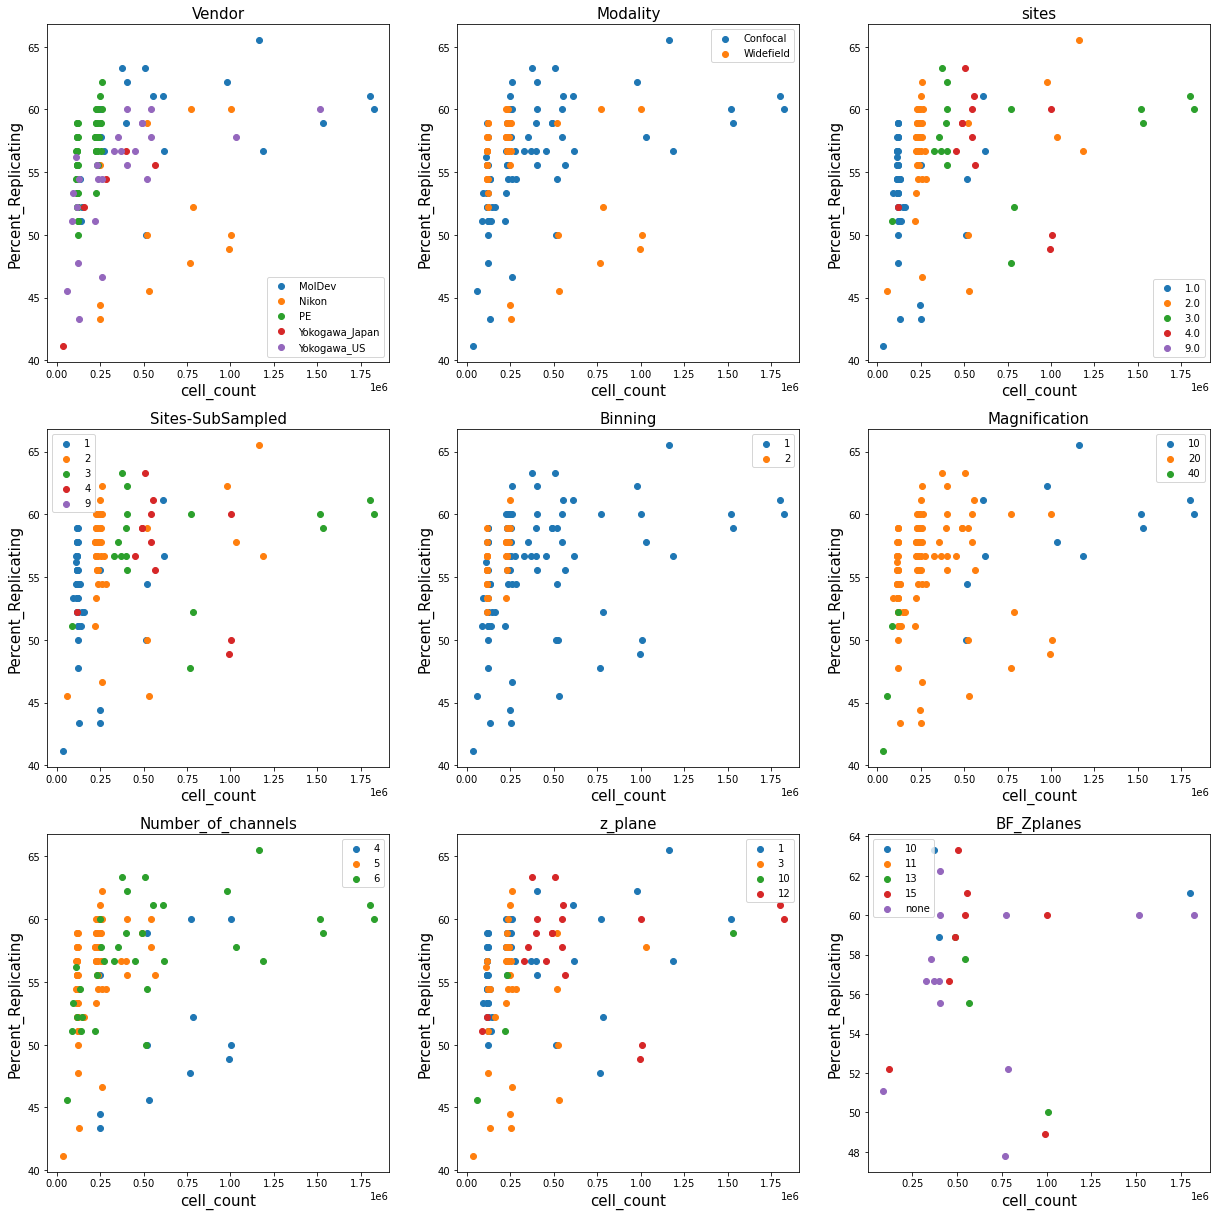

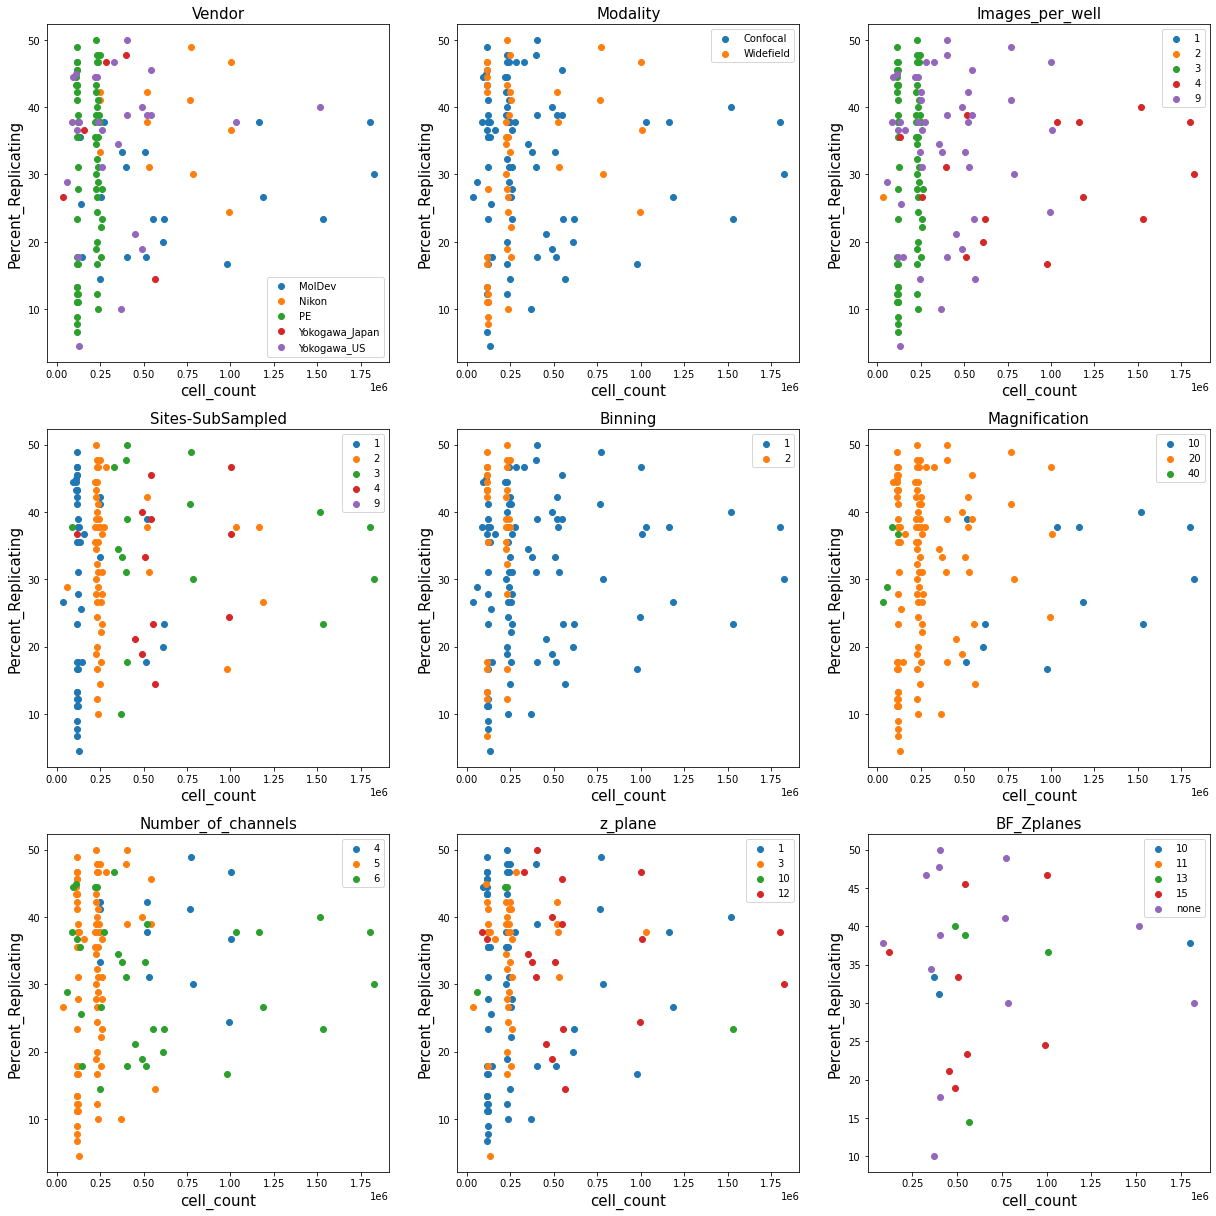

In [99]:
set(match_rep_df["spinning-disc"])



,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Images_per_well,Sites-SubSampled,Binning,Magnification,Number_of_channels,...,Replicating,Null_Replicating,Percent_Replicating,value_95_replicating,sphering,cell_count,Matching,Null_Matching,Percent_Matching,value_95_matching
256,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,4.0,1,10,6,...,"[0.21730362932204045, 0.6876733804973376, 0.81...","[0.0339234663238398, 0.10680142612082301, 0.16...",62.222222,0.263410,True,NaN,NaN,NaN,NaN,NaN
257,MolDev,Scope1_MolDev_10X,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,4,4.0,1,10,6,...,"[-0.01208344961806555, 0.16867586685374975, -0...","[0.0928763376746139, 0.07316289673010662, 0.05...",47.777778,0.330282,False,NaN,NaN,NaN,NaN,NaN
258,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,4.0,1,10,6,...,"[0.10837273581359493, 0.7233775126298321, 0.53...","[-0.18204721460982526, -0.07650076696790592, 0...",65.555556,0.208032,True,NaN,NaN,NaN,NaN,NaN
259,MolDev,Scope1_MolDev_10X_4siteZ,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,4,4.0,1,10,6,...,"[0.04598726037648686, 0.0006188245352166655, 0...","[0.0037057837785134406, 0.0989379021154683, 0....",52.222222,0.312696,False,NaN,NaN,NaN,NaN,NaN
260,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,4.0,1,20,6,...,"[0.10982941397898485, 0.4279981339036281, 0.72...","[-0.062451783052599505, -0.01654147888767702, ...",60.000000,0.181173,True,NaN,NaN,NaN,NaN,NaN
261,MolDev,Scope1_MolDev_20X_4site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,4,4.0,1,20,6,...,"[-0.08368671030668519, -0.10877433076034754, 0...","[0.028722799547365795, 0.11271920731024679, 0....",43.333333,0.310491,False,NaN,NaN,NaN,NaN,NaN
264,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_9site_20XPA_Crest,Confocal,9,9.0,1,20,6,...,"[0.21185193722992593, 0.6123513231367511, 0.79...","[0.08263844389609884, 0.1098742679338471, -0.0...",61.111111,0.329783,True,NaN,NaN,NaN,NaN,NaN
265,MolDev,Scope1_MolDev_20X_9site,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_9site_20XPA_Crest,Confocal,9,9.0,1,20,6,...,"[-0.04357962570957267, -0.1692625597566183, 0....","[0.38244957583639033, 0.1175619877570312, -0.0...",50.000000,0.360420,False,NaN,NaN,NaN,NaN,NaN
266,MolDev,Scope1_MolDev_20X_Adaptive,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_Adaptive_20XPA,Confocal,3,3.0,1,20,6,...,"[0.059303733693497326, 0.45768159596200836, 0....","[0.12261572973494647, 0.049736612064254934, 0....",54.444444,0.184221,True,NaN,NaN,NaN,NaN,NaN
267,MolDev,Scope1_MolDev_20X_Adaptive,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_Adaptive_20XPA,Confocal,3,3.0,1,20,6,...,"[0.44427416659774577, -0.02768993818334159, 0....","[0.0194863792716978, -0.0037140495639164826, 0...",18.888889,0.651199,False,NaN,NaN,NaN,NaN,NaN


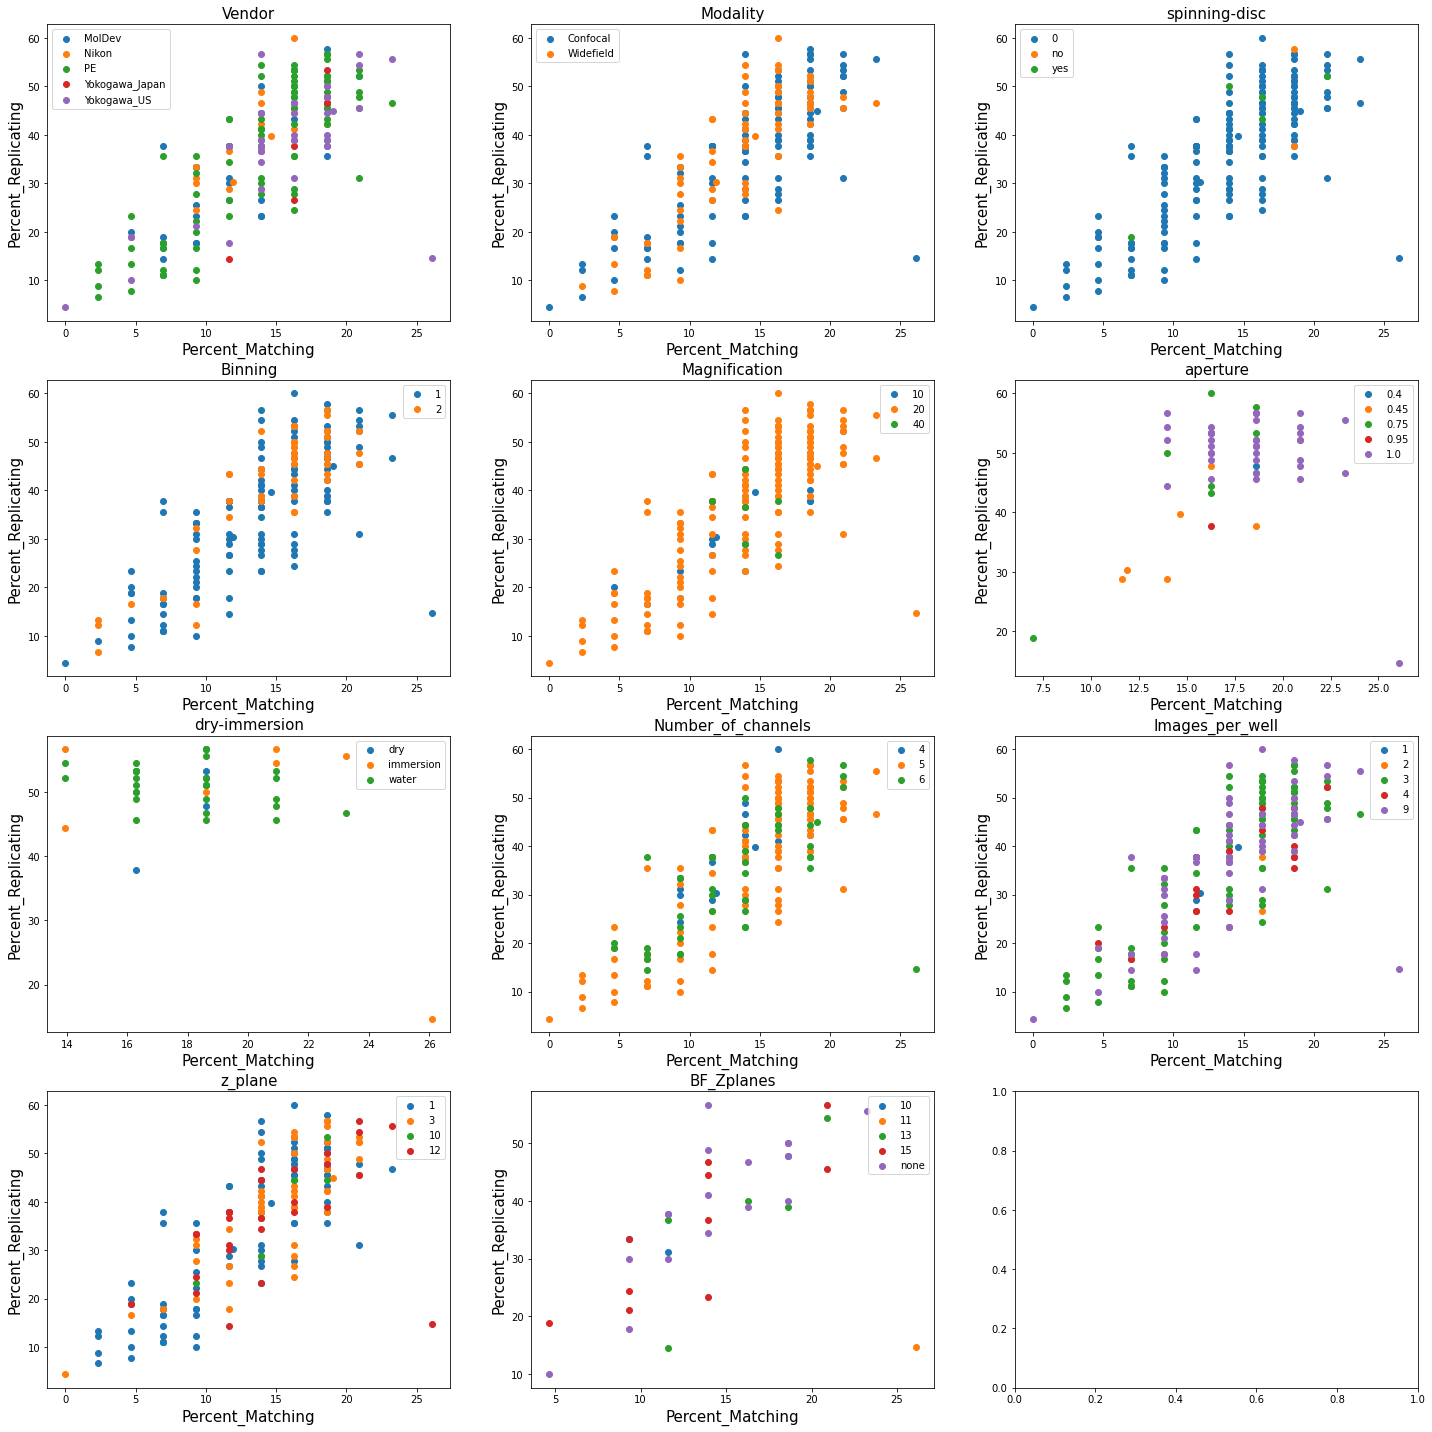

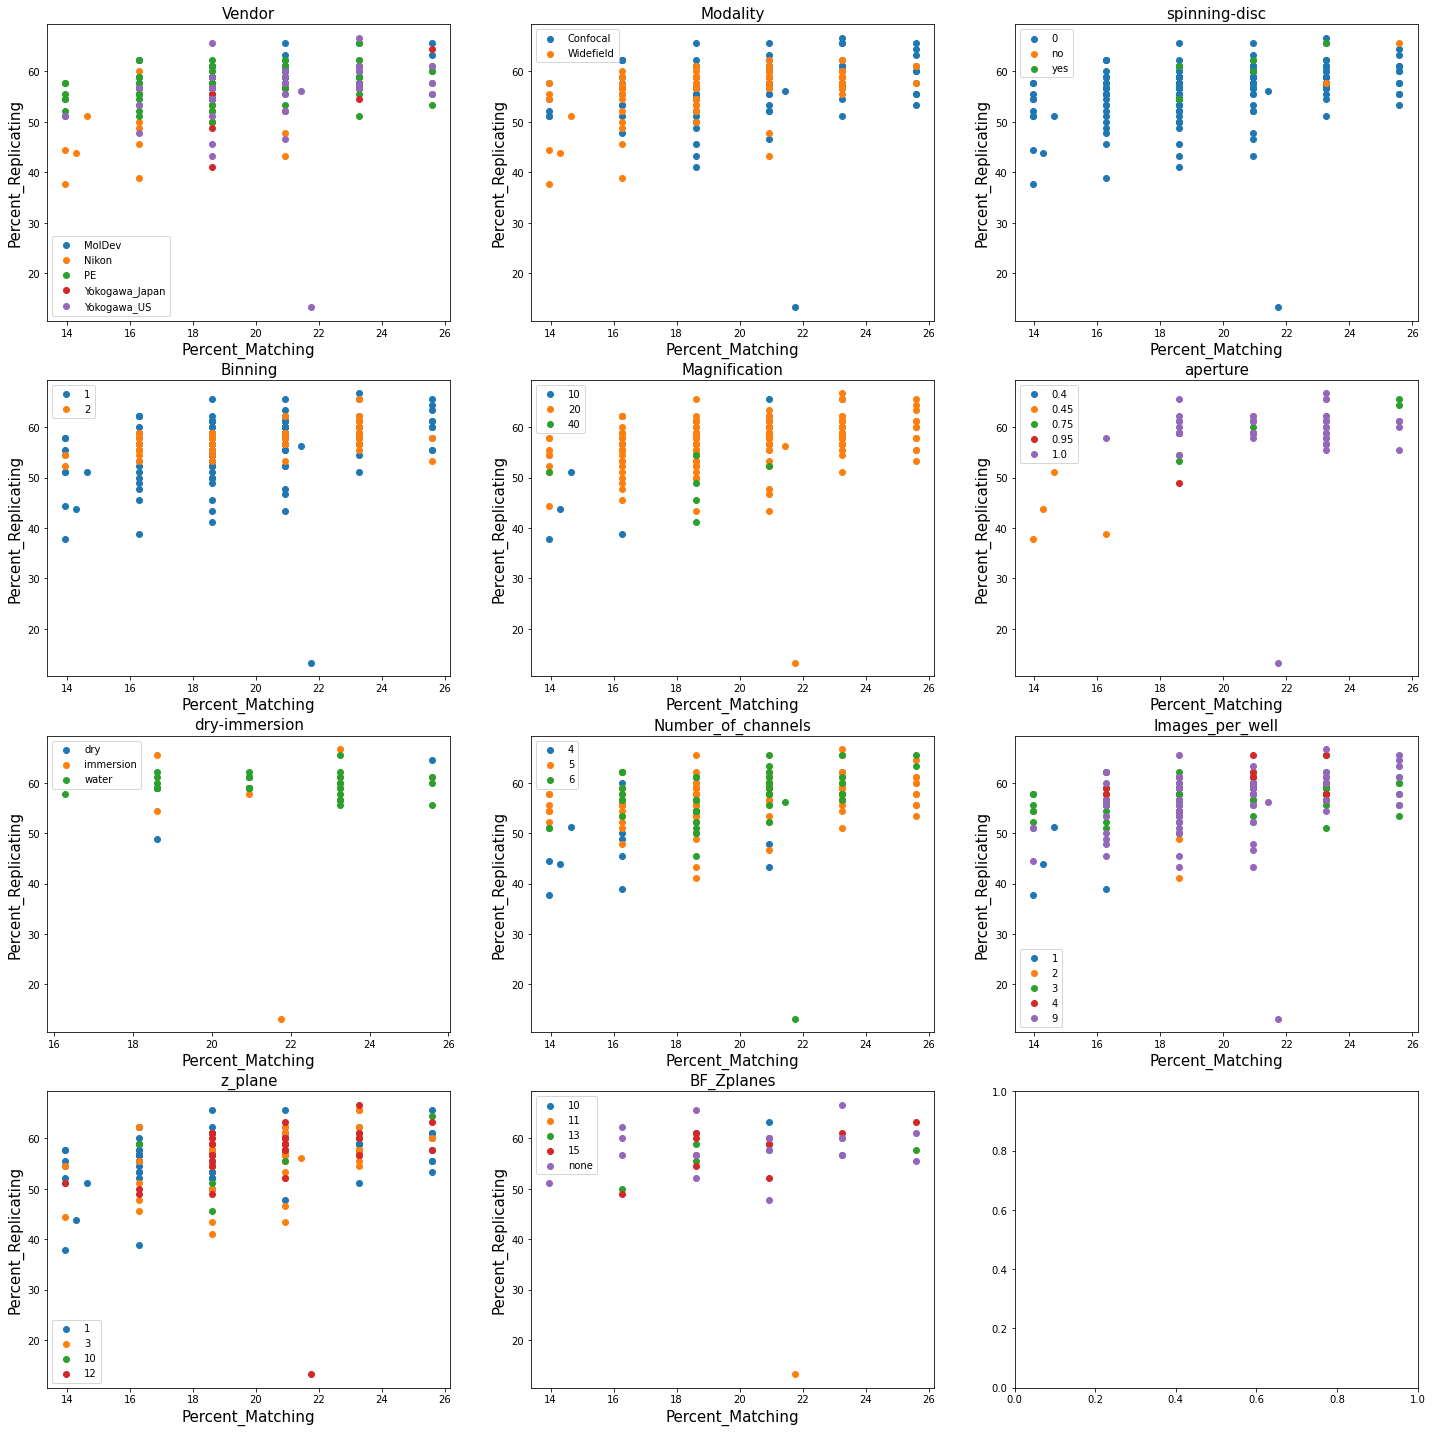

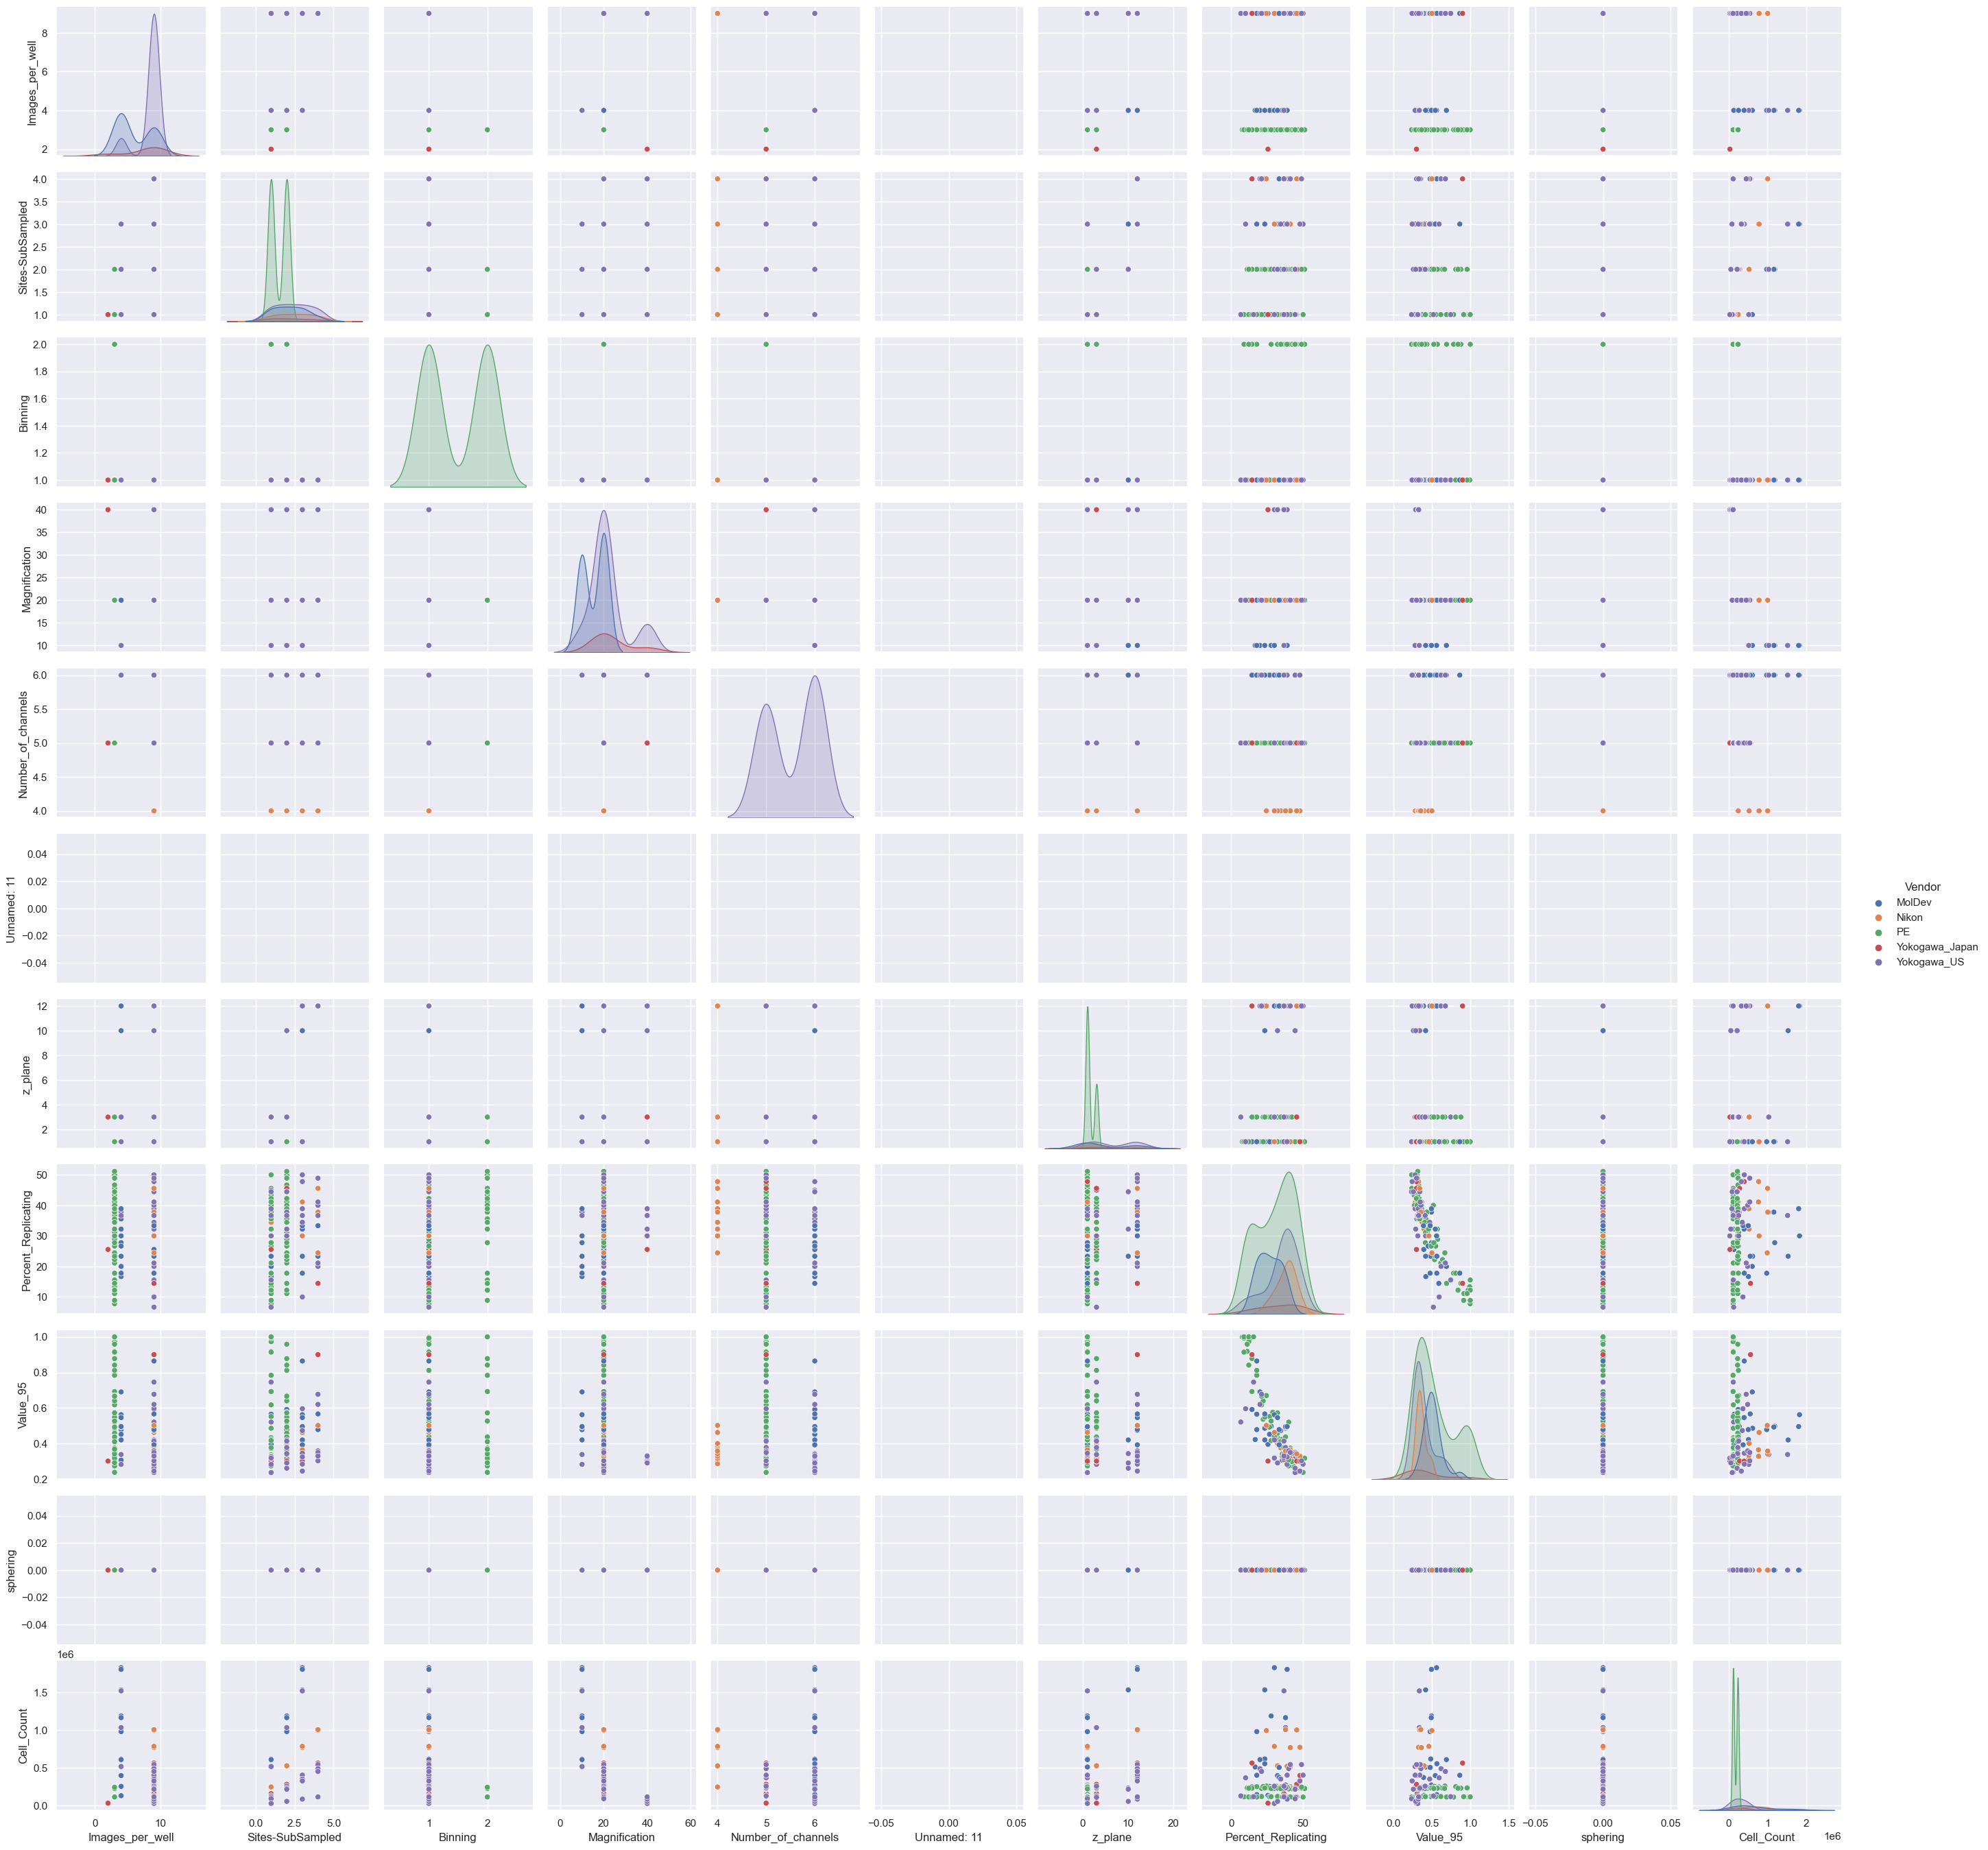

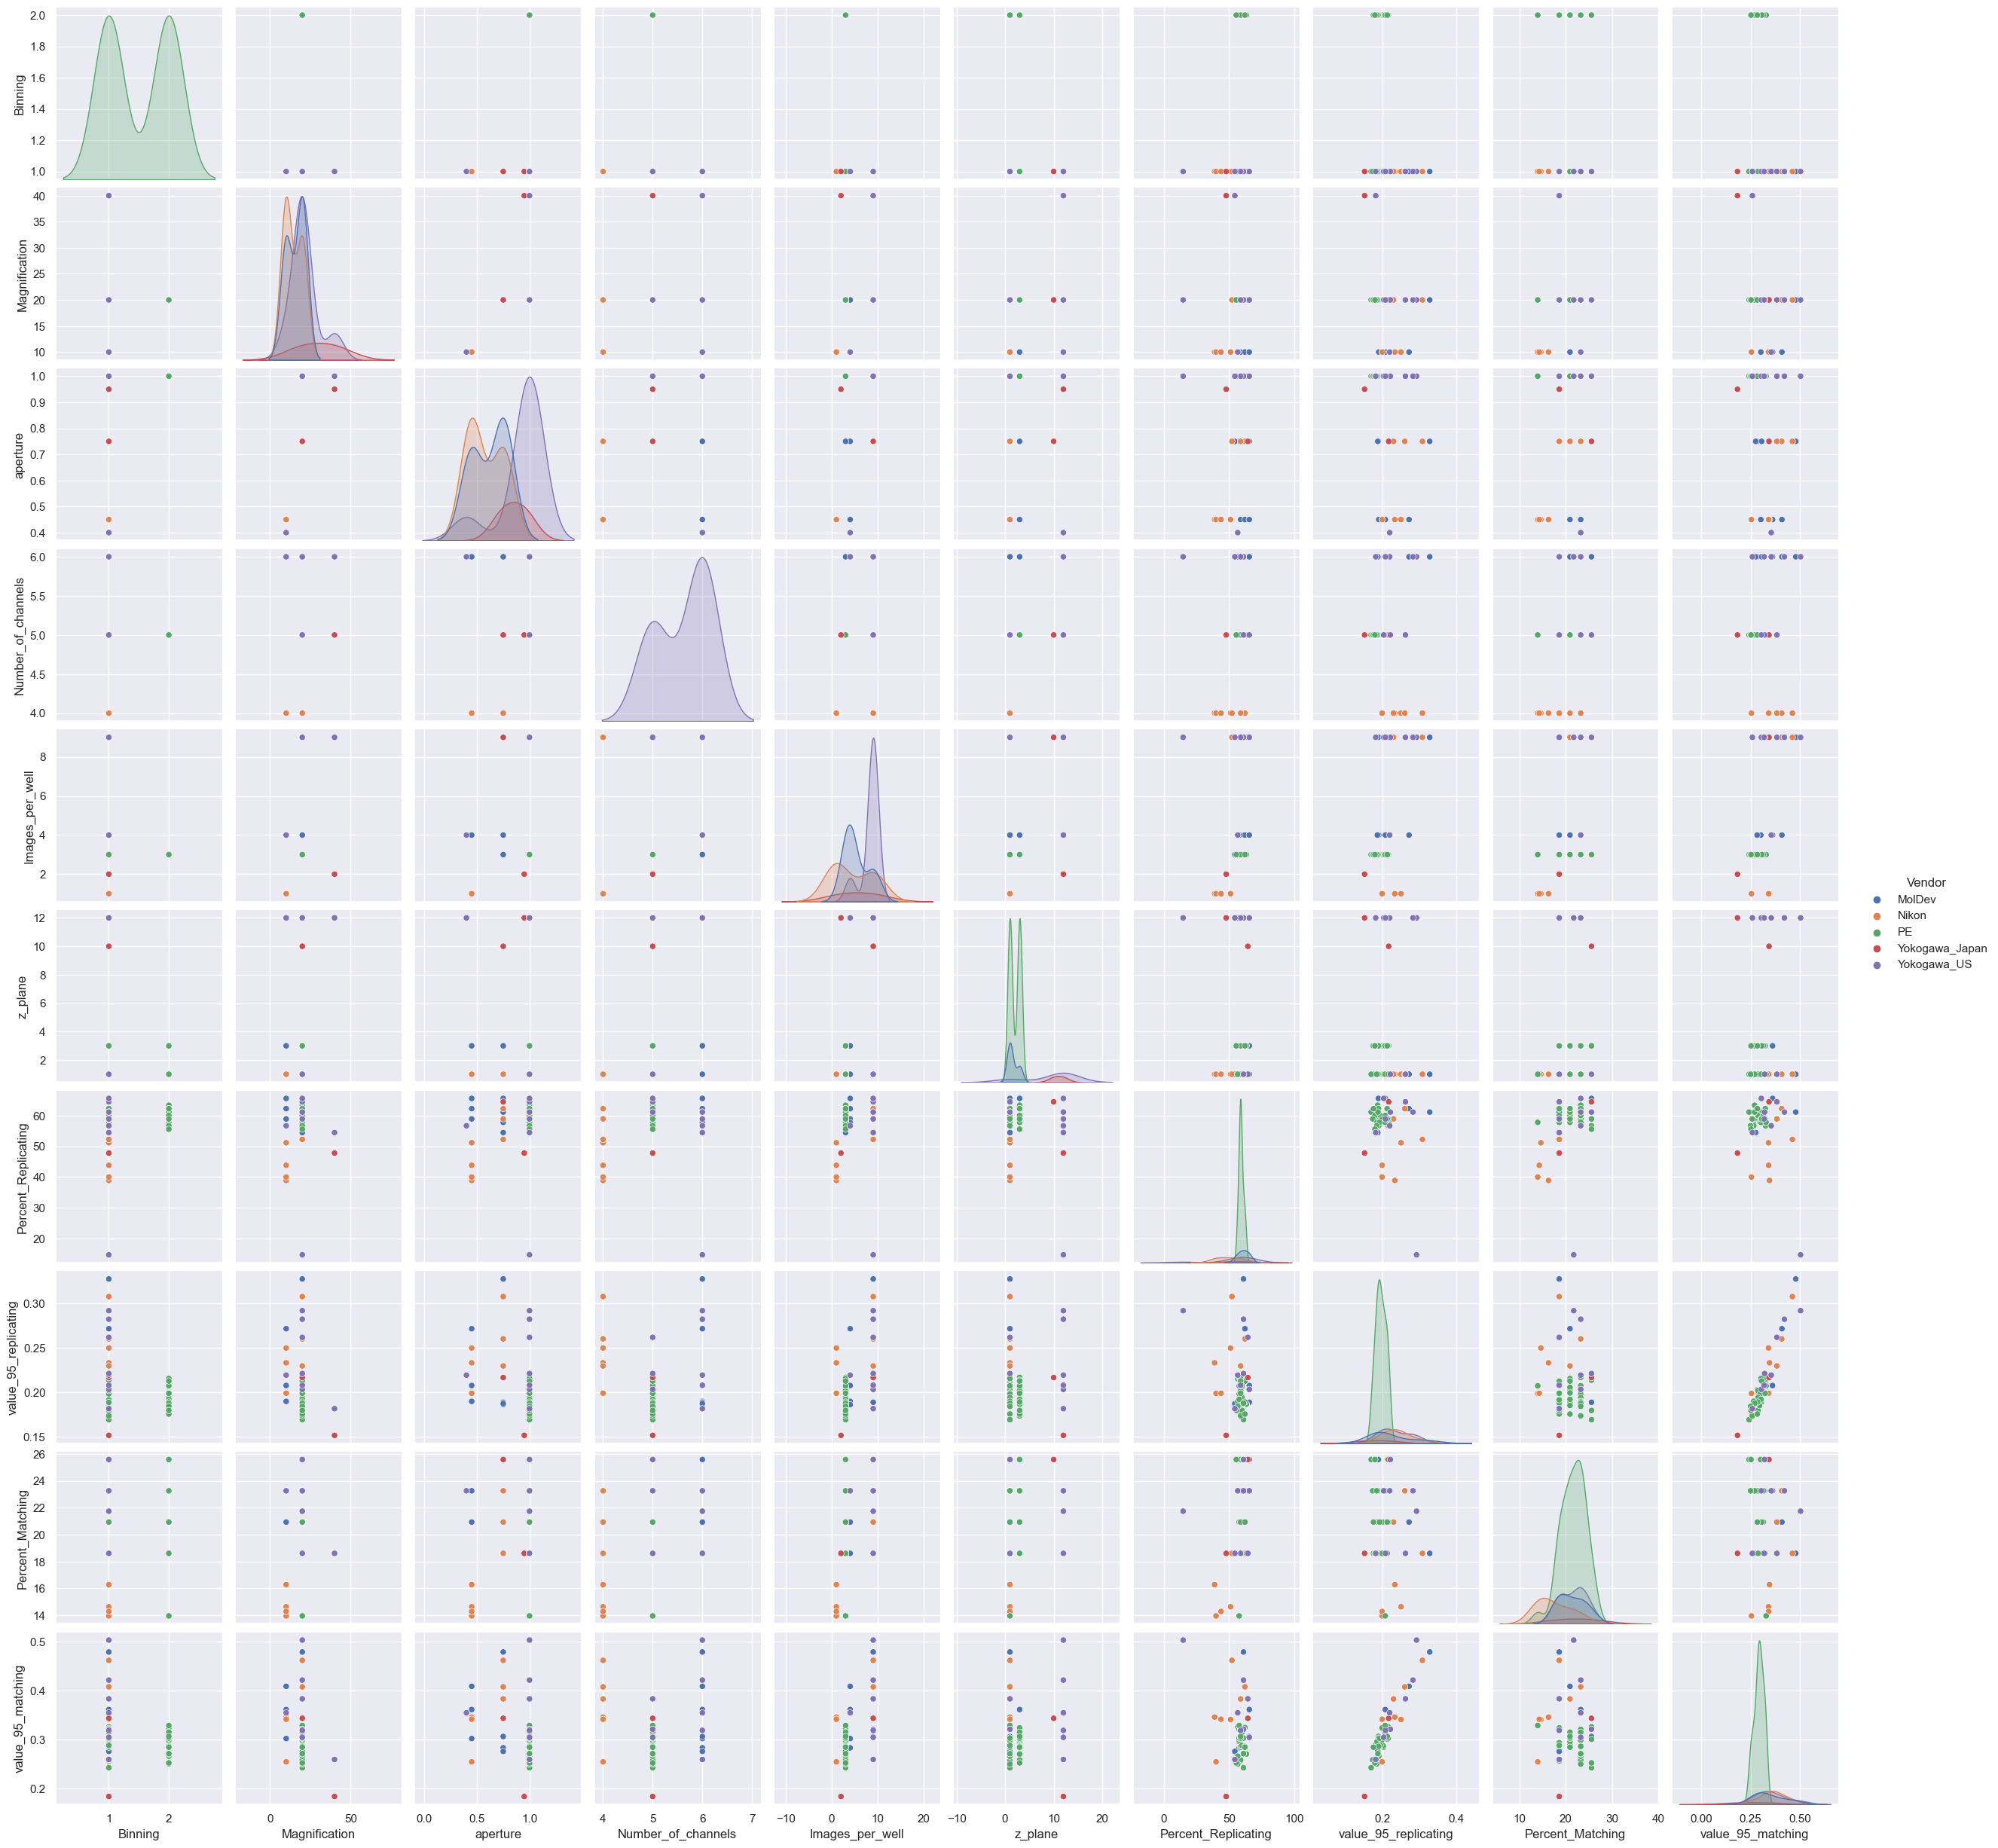

# Creating mean and SD columns for grouped DF

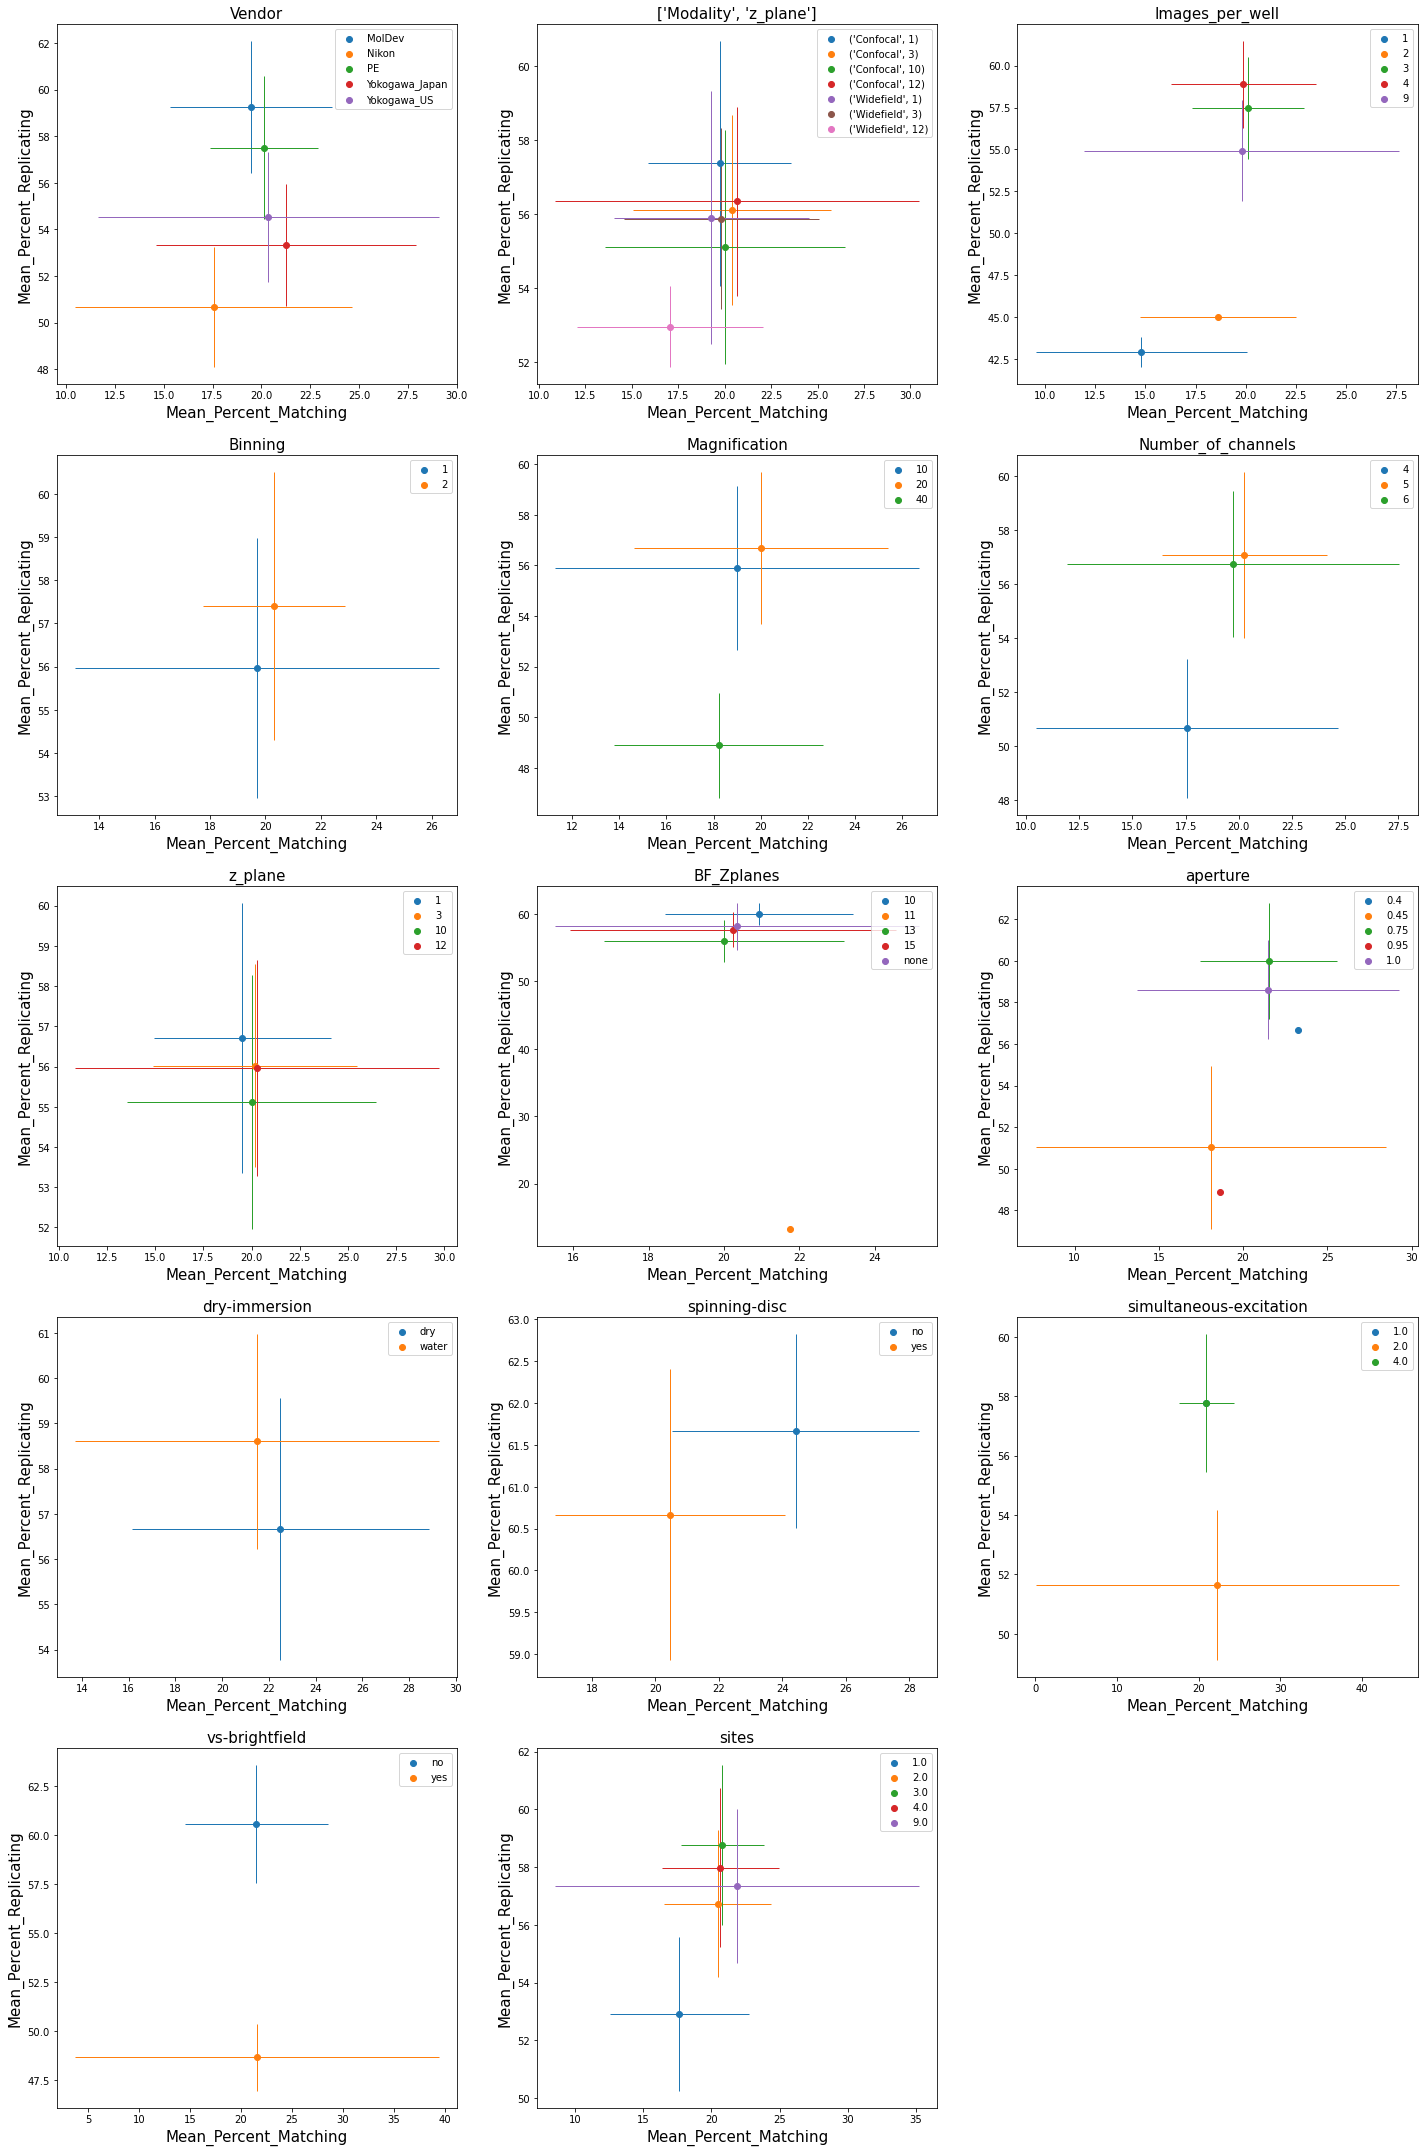

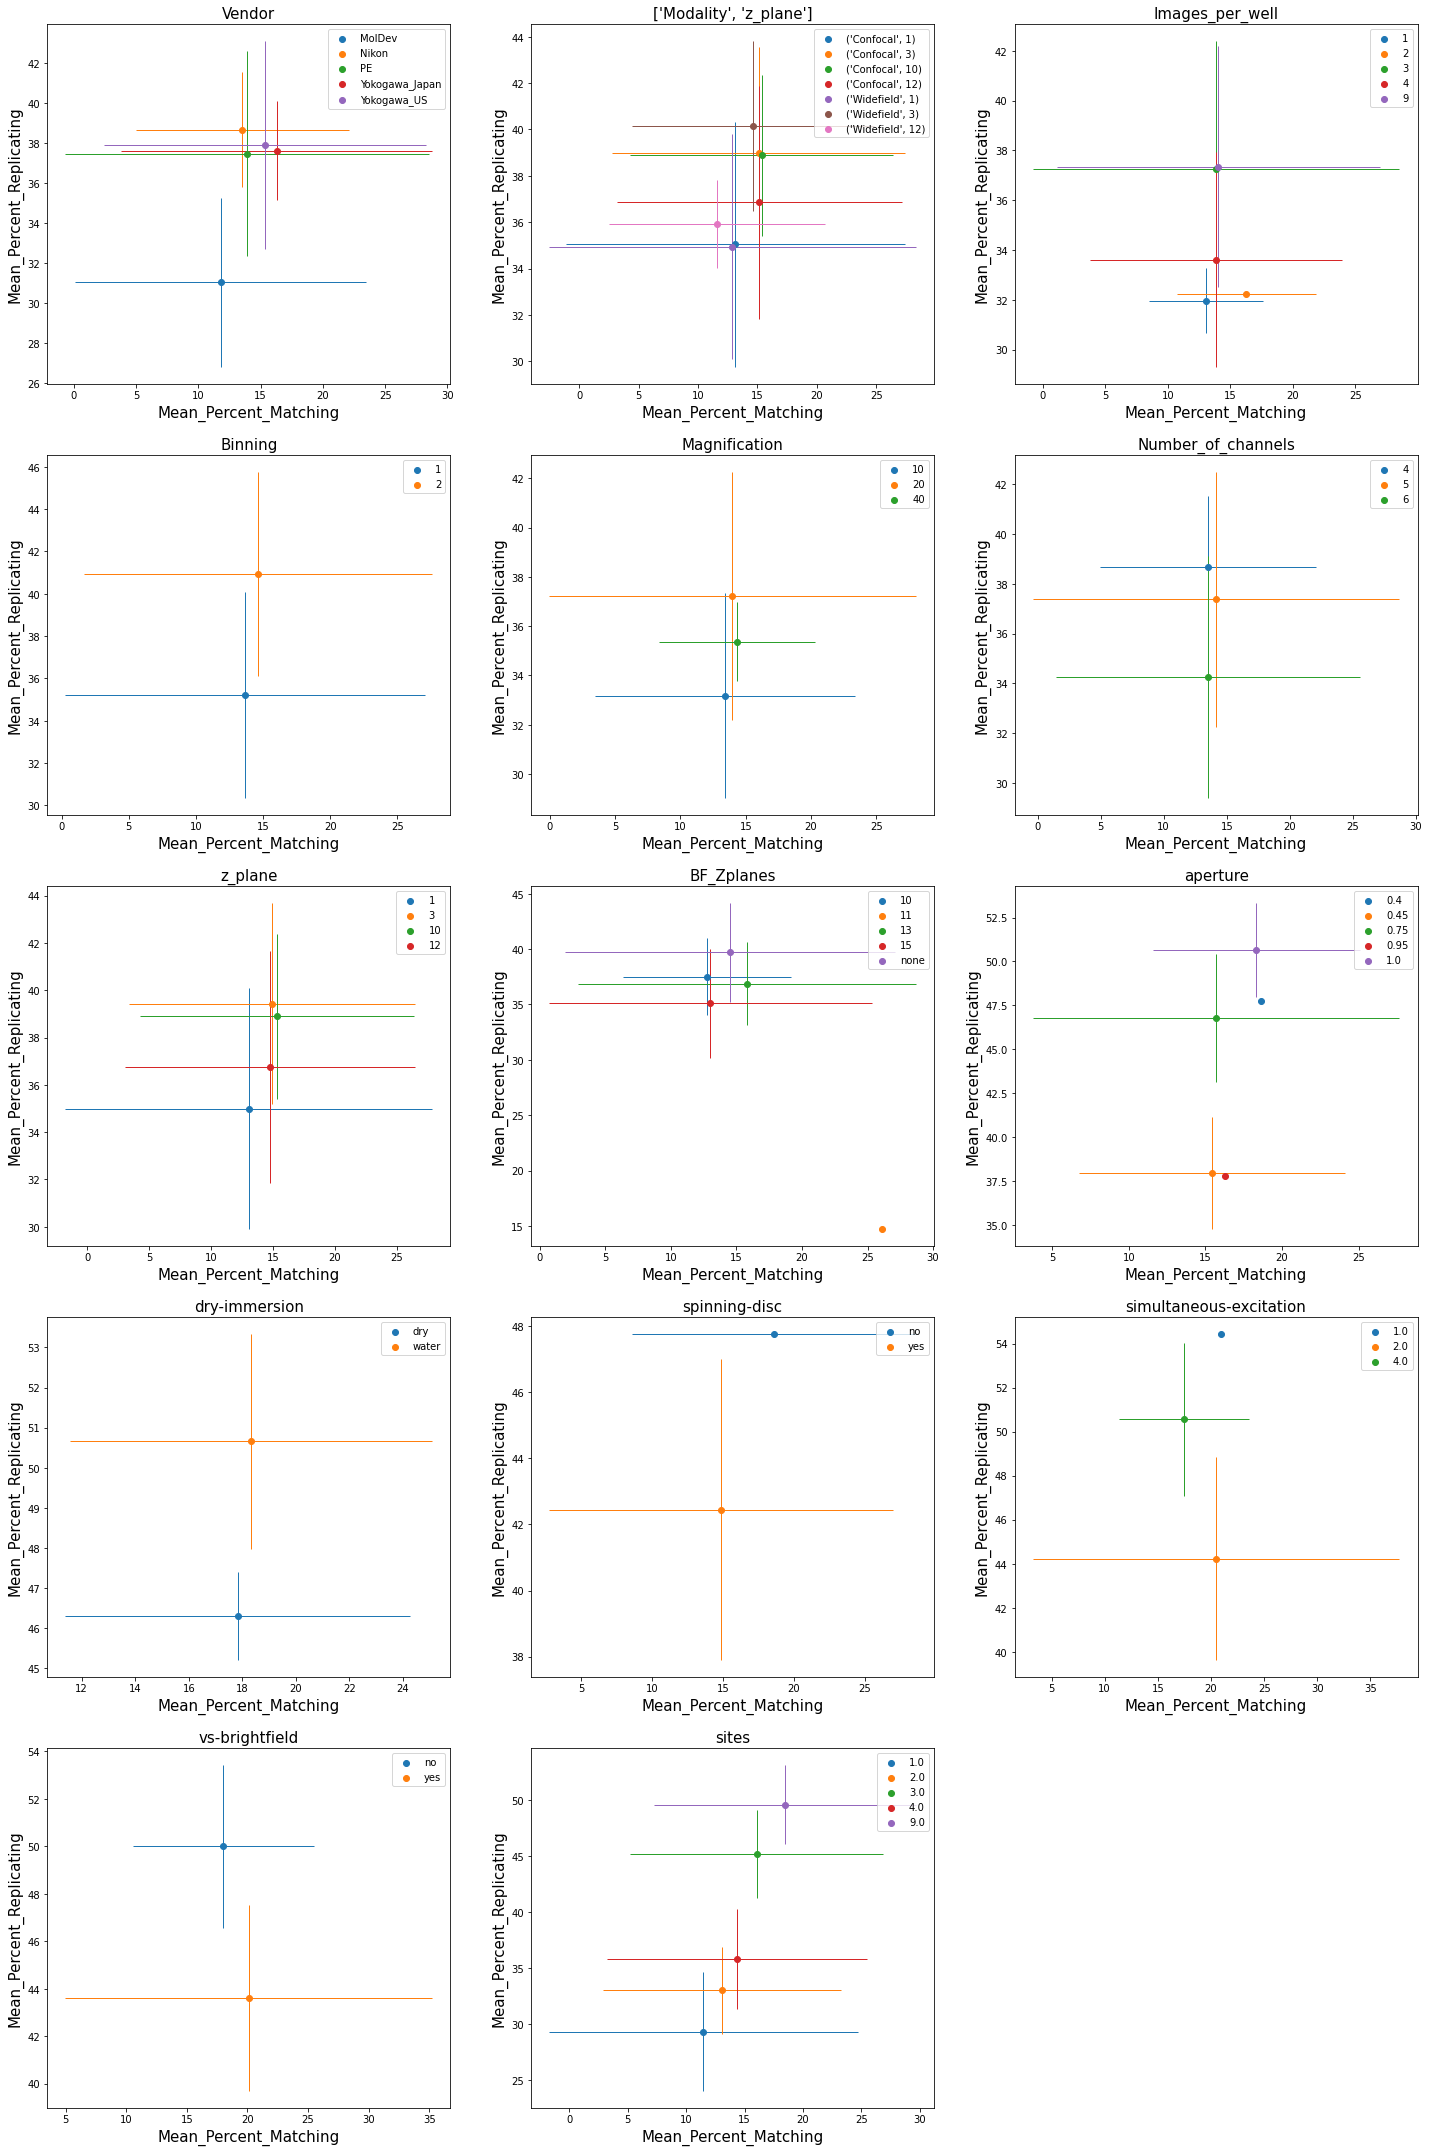

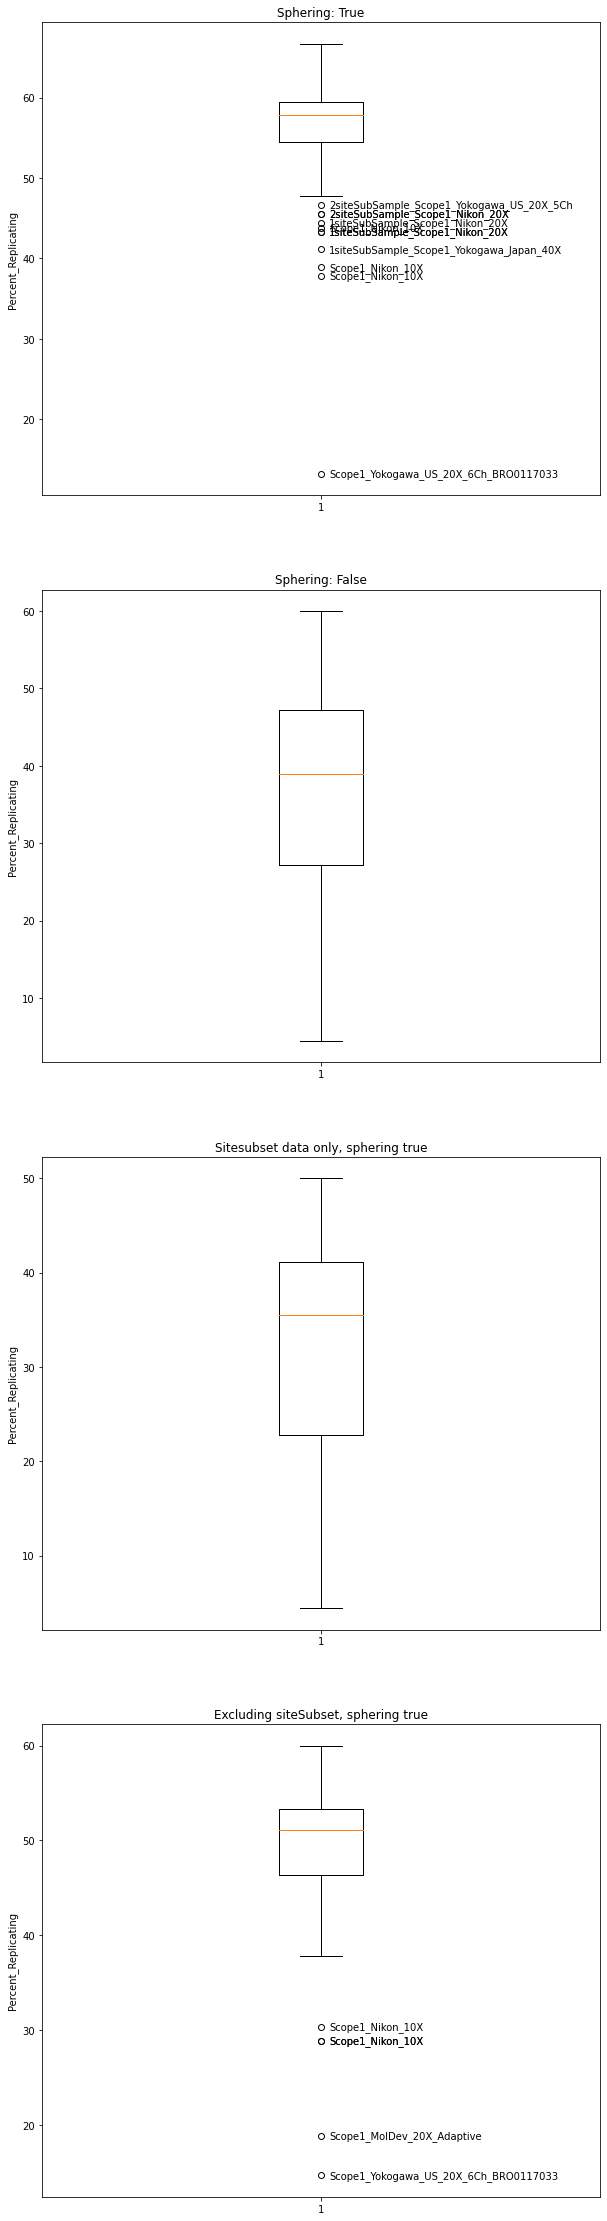

Processing MolDev
Processing Nikon
Processing PE


KeyboardInterrupt: 

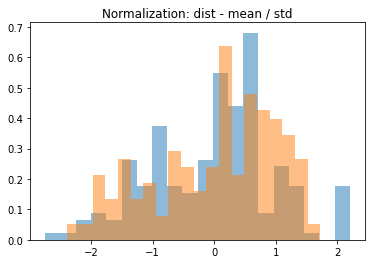

In [189]:
fig, ax = plt.subplots()

def normalize(distribution):
    new_dist = (distribution-np.mean(distribution))/np.std(distribution)
    return new_dist

i, j = zip(*t.items())
k = match_rep_df[match_rep_df["sphering"] == False]["Percent_Replicating"].values
histogram = ax.hist(normalize(j), density=True, bins=20, alpha=0.5)
ax.hist(normalize(k), label='replicates', density=True, bins=20, alpha=0.5)
ax.set_title("Normalization: dist - mean / std")
fig.set_facecolor("white")


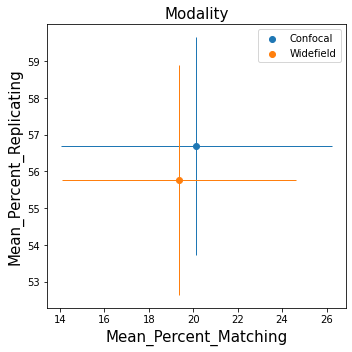

In [203]:
group_columns = ["Modality"]
# group_columns = [["Modality", "z_plane"], "Vendor", "Number_of_channels"]

# subplots = np.arange(len(group_columns)).reshape(-1,3).shape
subplots = (1, 1)
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(5,5))
group_df = find_group_avg_df(match_rep_df.loc[match_rep_df["sphering"]==True], "Modality")
group_plot(
    df=group_df, 
    x="Mean_Percent_Matching", 
    y="Mean_Percent_Replicating",
    group="Modality",
    error_x="SD_Percent_Replicating",
    error_y="SD_Percent_Matching",
    fig=fig, 
    ax_=ax)
fig.savefig("figures/confocal_vs_widefield_only.png", bbox_inches="tight")

In [201]:
group_df["SD_Percent_Matching"]

0    2.967
1    3.119
Name: SD_Percent_Matching, dtype: float64

In [197]:
find_group_avg_df(match_rep_df.loc[match_rep_df["sphering"]==True], "Modality")

,Modality,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
0,Confocal,"[17.77777777777778, 23.33333333333333, 20.0, 3...",36.778589,13.246,"[9.30232558139535, 13.953488372093023, 4.65116...",14.242339,5.060
1,Widefield,"[42.22222222222222, 41.11111111111111, 33.3333...",36.618554,13.943,"[18.6046511627907, 16.27906976744186, 9.302325...",13.377707,4.499
